# Blood Glucose Control - EDA

**Name:** [*Sneha Rao*]



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [29]:
import pandas as pd

df1 = pd.read_csv('gluroo_500030.csv')
df1["patientID"] = 500030
df2 = pd.read_csv('gluroo_679372.csv')
df2["patientID"] = 679372

df = pd.concat([df1,df2],ignore_index=True)

df["date"] = pd.to_datetime(df["date"], format="mixed", utc=True)

In [18]:
df

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,patientID
0,2024-05-01 05:00:27.029000+00:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 05:05:27.183000+00:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 05:10:26.949000+00:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 05:15:27.180000+00:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 05:20:27.021000+00:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59907,2024-08-01 03:44:59+00:00,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372
59908,2024-08-01 03:48:03+00:00,NaN,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372
59909,2024-08-01 03:52:06+00:00,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372
59910,2024-08-01 03:55:08+00:00,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372


In [8]:
df.duplicated().sum()

1

In [9]:
df.isna().sum()

date                        0
sender_id               31384
bgl                       269
bgl_date_millis         31408
text                    31394
template                32134
msg_type                31384
affects_fob             31384
affects_iob             31384
dose_units              31705
food_g                  31890
food_glycemic_index     31899
dose_automatic          31384
fp_bgl                  32168
message_basal_change    32175
__typename                245
trend                    1036
dtype: int64

In [10]:
df.shape

(32175, 17)

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

### PLot 1: Blood Glucose Levels Over Time (Time Series Plot)

This plot displays the blood glucose levels over time for two patients. Each patient’s data is represented by a separate line, allowing us to compare the trends and fluctuations in their glucose levels. It helps visualize how stable or variable the glucose levels are and identify any potential spikes or drops during specific time intervals. This can help identify daily trends, periods of high variability, or patterns tied to events like meals or insulin doses.

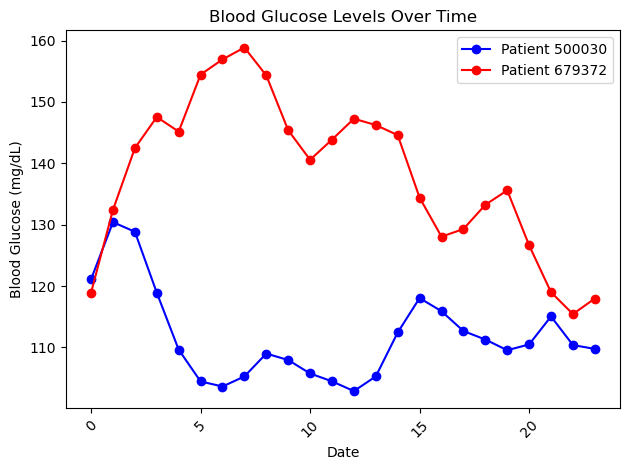

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter data to ensure valid BGL readings
df_bgl = df[['date', 'bgl','patientID']].dropna()
df_bgl['hour'] = df_bgl['date'].dt.hour

df_bgl_avg = df_bgl.groupby(['patientID', 'hour'])['bgl'].mean().reset_index()
df1_bgl_500030 = df_bgl_avg[df_bgl_avg['patientID'] == 500030]
df1_bgl_679372 = df_bgl_avg[df_bgl_avg['patientID'] == 679372]

# 1. Time Series Plot
plt.plot(df1_bgl_500030['hour'], df1_bgl_500030['bgl'], color='blue',label=f'Patient {500030}', marker='o')
plt.plot(df1_bgl_679372['hour'], df1_bgl_679372['bgl'], color='red', label=f'Patient {679372}', marker='o')

plt.title('Blood Glucose Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Blood Glucose (mg/dL)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Plot 2: Distribution of Blood Glucose Levels (Histogram + KDE Plot)

This plot shows the distribution of blood glucose levels for both patients using histograms and a Kernel Density Estimate (KDE). The KDE smooths out the histogram to provide a clearer view of where the blood glucose levels are concentrated. By comparing the histograms, we can see if one patient has more frequent high or low glucose readings and how often each patient’s readings fall within a target range.

/Users/sneha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


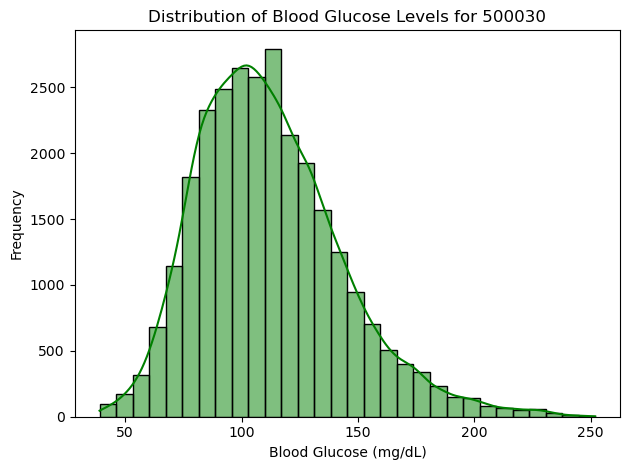

/Users/sneha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


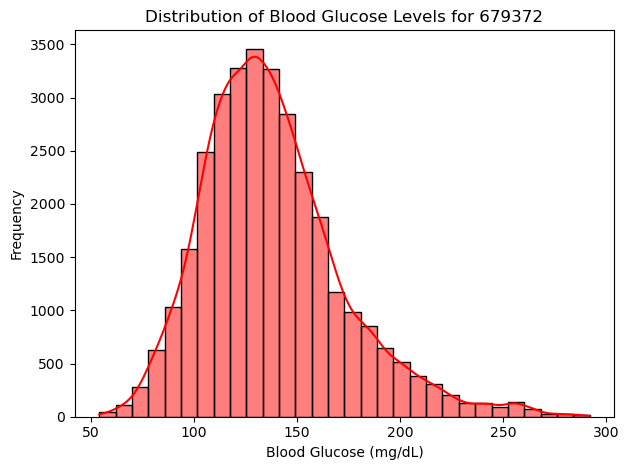

In [41]:
# 2. Distribution Plot (Histogram and Kernel Density)
df1_bgl_500030 = df_bgl[df_bgl['patientID'] == 500030]
df1_bgl_679372 = df_bgl[df_bgl['patientID'] == 679372]
sns.histplot(df1_bgl_500030['bgl'], kde=True, bins=30, color='green')
plt.title('Distribution of Blood Glucose Levels for 500030')
plt.xlabel('Blood Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

sns.histplot(df1_bgl_679372['bgl'], kde=True, bins=30, color='red')
plt.title('Distribution of Blood Glucose Levels for 679372')
plt.xlabel('Blood Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Box Plot of Blood Glucose Levels by Patient

The box plot compares the overall distribution of blood glucose levels between the two patients. It provides information on the median, interquartile range, and potential outliers. This plot helps identify which patient has more variability in glucose levels and how their readings compare in terms of central tendency (median) and spread (interquartile range).

/Users/sneha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


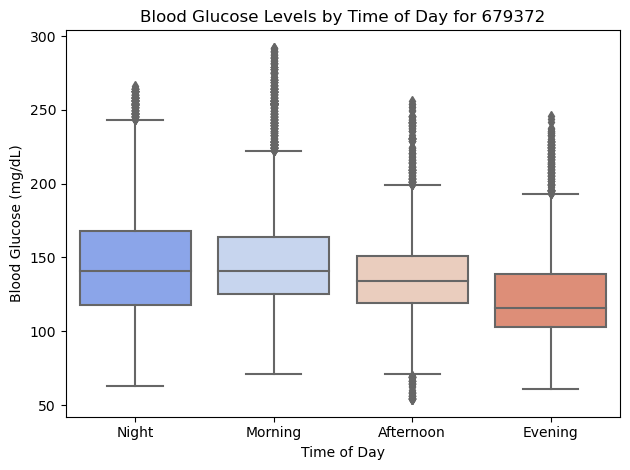

/Users/sneha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


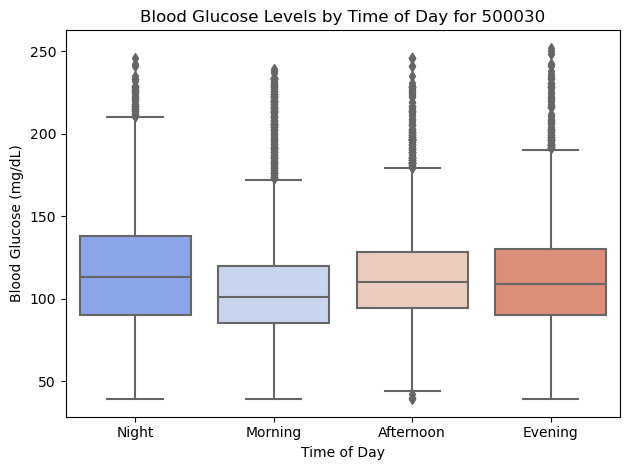

In [46]:
# 3. Box Plot by Time of Day
# Extract hour from the 'date' column
time_bins = pd.cut(df_bgl['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

sns.boxplot(x=time_bins, y='bgl', data=df_bgl[df_bgl['patientID'] == 679372], palette='coolwarm')
plt.title('Blood Glucose Levels by Time of Day for 679372')
plt.xlabel('Time of Day')
plt.ylabel('Blood Glucose (mg/dL)')
plt.tight_layout()
plt.show()

sns.boxplot(x=time_bins, y='bgl', data=df_bgl[df_bgl['patientID'] == 500030], palette='coolwarm')
plt.title('Blood Glucose Levels by Time of Day for 500030')
plt.xlabel('Time of Day')
plt.ylabel('Blood Glucose (mg/dL)')
plt.tight_layout()
plt.show()

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Is there anything related to lifestyle that causes Latent Autoimmune Diabetes of Adults (LADA) or Type-1 diabetes in young people (<30 yrs age)?
2. How does physical activity affect blood glucose levels for each patient, and is there a noticeable trend of glucose dropping post-exercise?
3. Is there a correlation between meal times or insulin administration and significant changes in blood glucose levels for each patient?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`